📁 Please upload your phishing websites dataset:


Saving phishing websites.csv to phishing websites.csv

📊 Dataset Information:
Total samples: 11430
Total features: 88

First few rows:
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0 

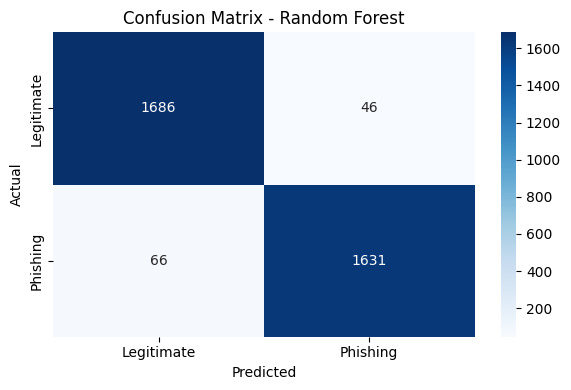

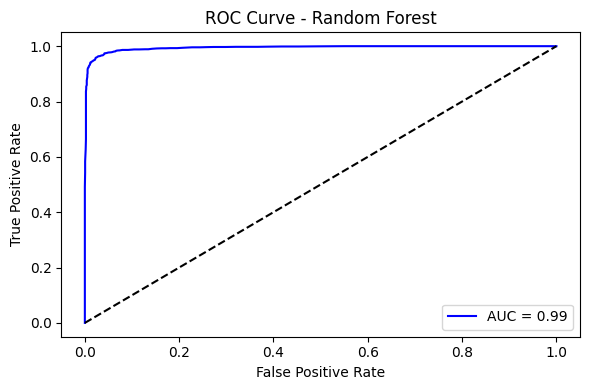


🔍 Training Gradient Boosting...
Accuracy: 96.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1732
           1       0.96      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



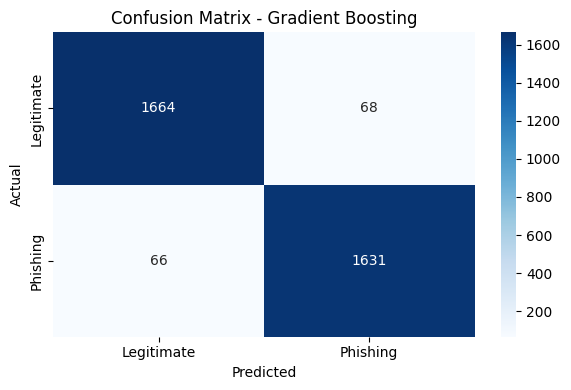

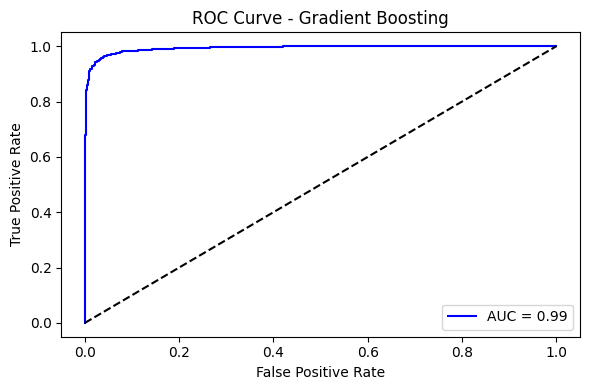


🔍 Training Support Vector Machine...
Accuracy: 95.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1732
           1       0.96      0.94      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



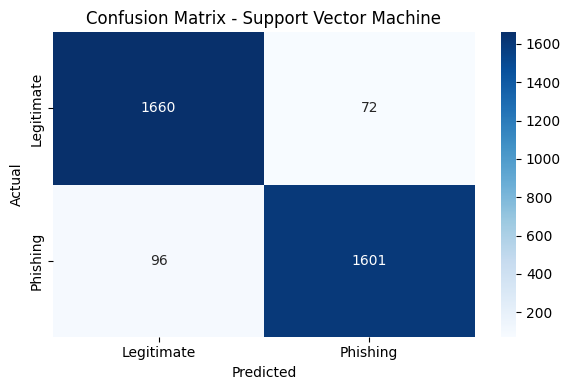

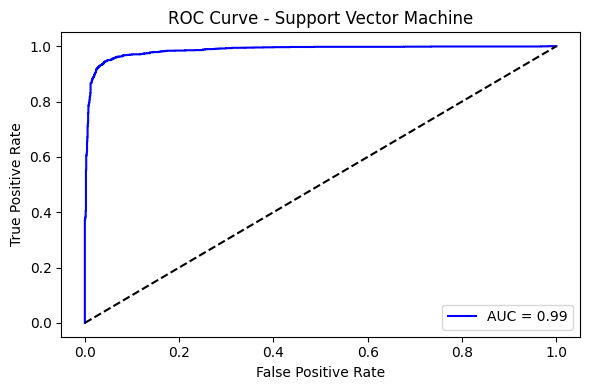


🔍 Training K-Nearest Neighbors...
Accuracy: 94.34%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1732
           1       0.95      0.93      0.94      1697

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



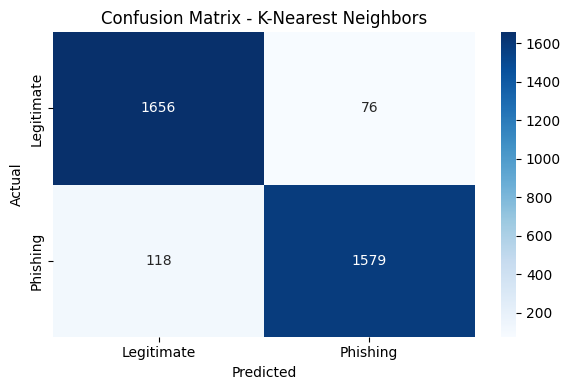

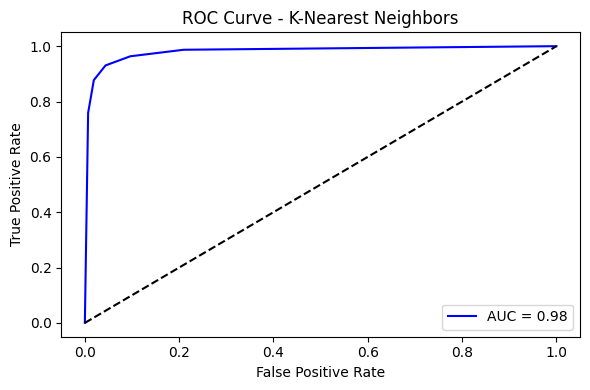


🔍 Training Logistic Regression...
Accuracy: 94.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1732
           1       0.95      0.94      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



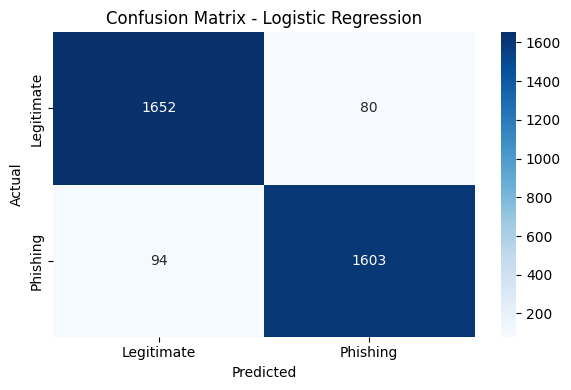

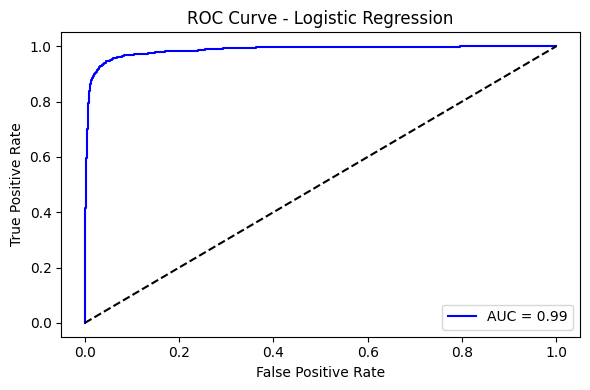


🔍 Training Decision Tree...
Accuracy: 92.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1732
           1       0.93      0.92      0.93      1697

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429



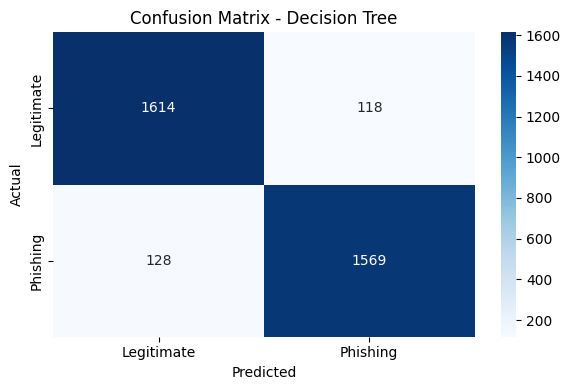

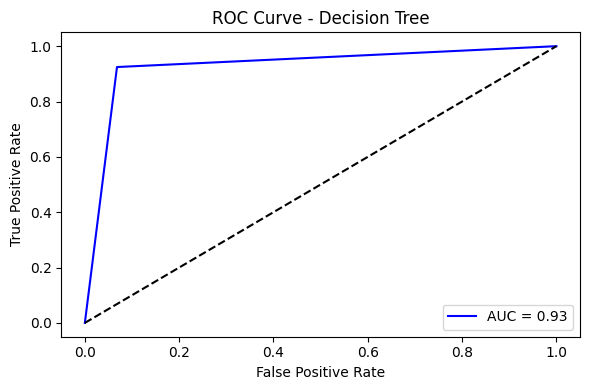


🔍 Training Naive Bayes...
Accuracy: 68.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1732
           1       0.95      0.38      0.54      1697

    accuracy                           0.68      3429
   macro avg       0.78      0.68      0.65      3429
weighted avg       0.78      0.68      0.65      3429



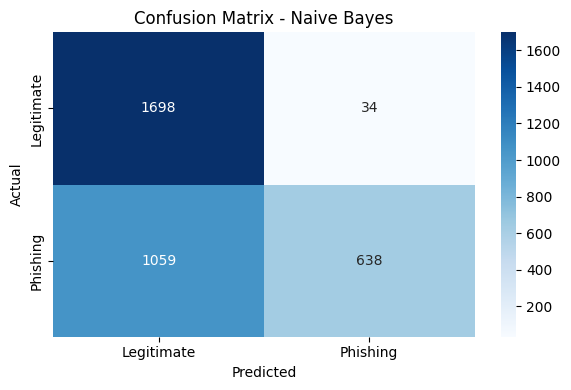

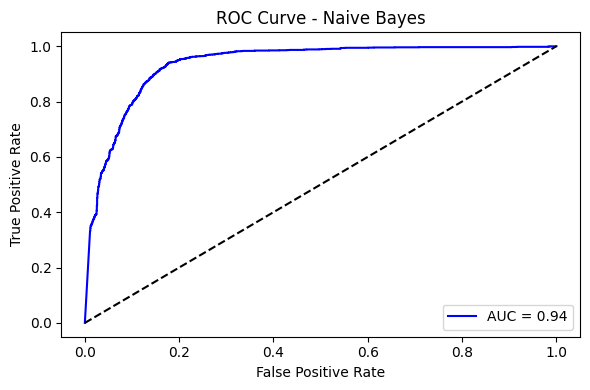


📊 Performance Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0           Random Forest  0.967337   0.967397  0.967337  0.967334
1       Gradient Boosting  0.960922   0.960923  0.960922  0.960922
2  Support Vector Machine  0.951006   0.951088  0.951006  0.951000
3     K-Nearest Neighbors  0.943424   0.943676  0.943424  0.943408
4     Logistic Regression  0.949256   0.949282  0.949256  0.949253
5           Decision Tree  0.928259   0.928269  0.928259  0.928256
6             Naive Bayes  0.681248   0.780944  0.681248  0.648682


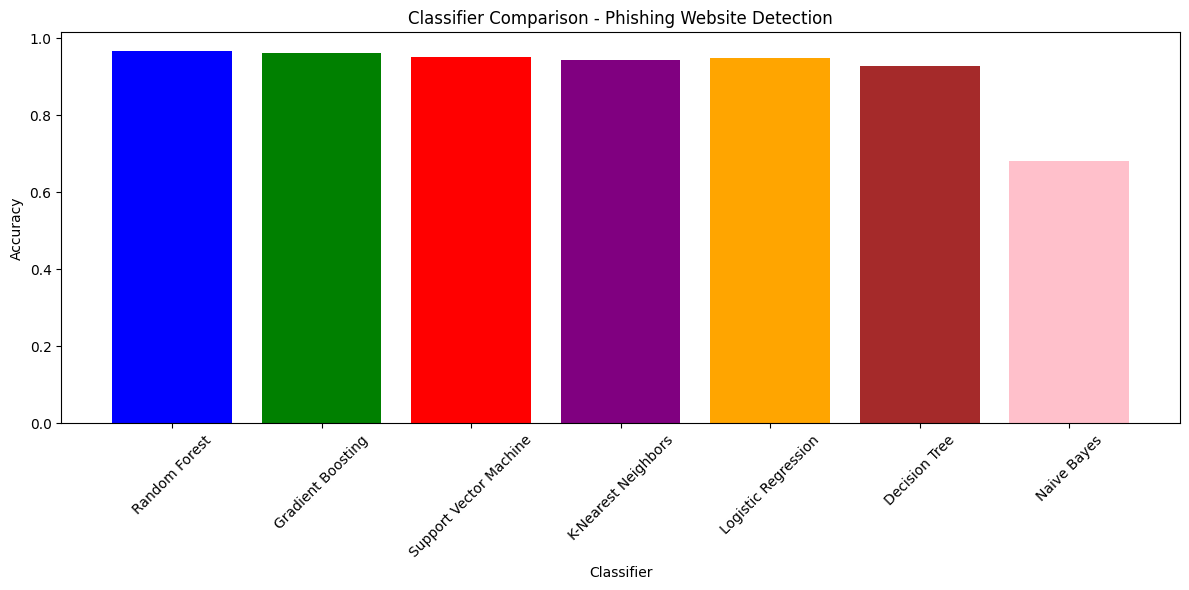

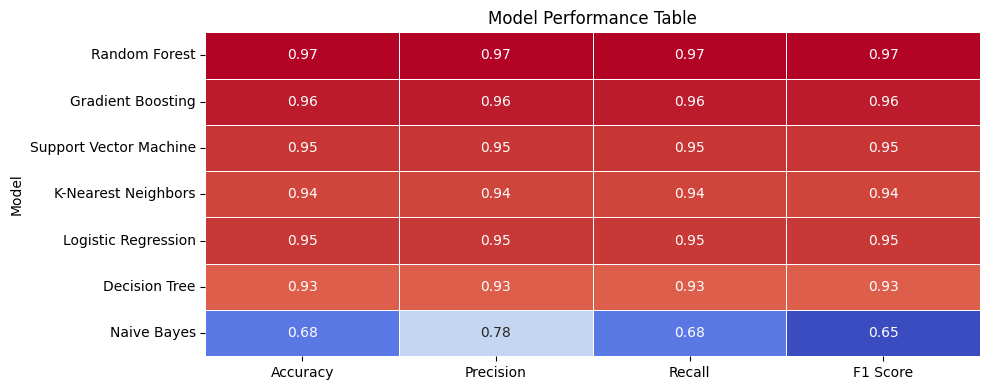


🏆 Best model: Random Forest with accuracy 0.9673
Saving best model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved and downloaded!

Do you want to test the model on new data? (y/n): n

✅ Analysis complete!


In [1]:
# -*- coding: utf-8 -*-
"""
Phishing Website Detection Model

This script provides a complete pipeline for:
1. Data loading via file upload
2. Data preprocessing
3. Model training with multiple classifiers
4. Comprehensive evaluation (including accuracy, classification reports, confusion matrices, and ROC curves)
5. Model comparison visualization
6. Best model saving for deployment
7. Optional testing on new data
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             precision_score, recall_score, f1_score, roc_curve, auc)

# For Google Colab environment
try:
    from google.colab import files
    IN_COLAB = True
    print("📁 Please upload your phishing websites dataset:")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)
except:
    IN_COLAB = False
    # If not in Colab, use this to specify file path
    file_path = input("Enter the path to your phishing websites dataset: ")
    df = pd.read_csv(file_path)

# Display basic dataset information
print("\n📊 Dataset Information:")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]-1}")  # -1 for target column
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

# Check for missing values and drop them
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"\n⚠️ Found {missing_values} missing values. Dropping rows with missing values.")
    df.dropna(inplace=True)
    print(f"Remaining samples: {df.shape[0]}")

# Check target column - assuming it's called "status"
target_column = "status"
if target_column not in df.columns:
    target_column = input("Target column not found. Please enter the name of the target column: ")

# Extract features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"\nTarget distribution:\n{y.value_counts()}")
print(f"Target type: {y.dtype}")

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    print(f"Encoding categorical column: {col}")
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store for inverse transformation if needed

# Convert target variable to binary if not already (0 = Legitimate, 1 = Phishing)
if y.dtype == 'object':
    print("Encoding target column")
    target_encoder = LabelEncoder()
    y = target_encoder.fit_transform(y)
    print(f"Classes mapped to: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Normalize/Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True),  # Enable probability for ROC
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Store results for comparison
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

best_model = None
best_accuracy = 0
best_model_name = ""

# Train and evaluate each classifier
for name, model in classifiers.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics for comparison
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

    # ROC Curve (Only for models supporting probability predictions)
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get probability of positive class
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
            plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve - {name}")
            plt.legend(loc="lower right")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"⚠️ Warning: Could not generate ROC curve for {name}. Error: {e}")

# Create metrics dataframe for comparison
metrics_df = pd.DataFrame(metrics)
print("\n📊 Performance Comparison:")
print(metrics_df)

# Compare classifier performance with bar chart
plt.figure(figsize=(12, 6))
plt.bar(metrics["Model"], metrics["Accuracy"], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Comparison - Phishing Website Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Seaborn Styled Heatmap as Table
plt.figure(figsize=(10, 4))
sns.heatmap(metrics_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=False)
plt.title("Model Performance Table")
plt.tight_layout()
plt.show()

# Save the best model
print(f"\n🏆 Best model: {best_model_name} with accuracy {best_accuracy:.4f}")
print("Saving best model...")

# Save components for deployment
components = {
    "model": best_model,
    "scaler": scaler,
    "label_encoders": label_encoders
}

try:
    if IN_COLAB:
        with open("phishing_detection_model.pkl", "wb") as f:
            pickle.dump(components, f)
        files.download("phishing_detection_model.pkl")
        print("Model saved and downloaded!")
    else:
        with open("phishing_detection_model.pkl", "wb") as f:
            pickle.dump(components, f)
        print("Model saved as 'phishing_detection_model.pkl'")
except Exception as e:
    print(f"Error saving model: {e}")

# Ask user if they want to test on new data
test_new = input("\nDo you want to test the model on new data? (y/n): ").lower()

if test_new == 'y':
    try:
        if IN_COLAB:
            print("📁 Please upload your new test dataset:")
            uploaded = files.upload()
            test_file_name = list(uploaded.keys())[0]
            new_data = pd.read_csv(test_file_name)
        else:
            test_file_path = input("Enter the path to your test dataset: ")
            new_data = pd.read_csv(test_file_path)

        # Handle target column in test data
        target_in_test = input(f"Does your test data contain a target column named '{target_column}'? (y/n): ").lower()

        if target_in_test == 'y':
            X_new = new_data.drop(columns=[target_column])
            y_true = new_data[target_column]

            # Encode target if needed
            if y_true.dtype == 'object' and hasattr(locals(), 'target_encoder'):
                y_true = target_encoder.transform(y_true)

            # Process categorical features
            for col in X_new.select_dtypes(include=['object']).columns:
                if col in label_encoders:
                    X_new[col] = label_encoders[col].transform(X_new[col])
                else:
                    print(f"⚠️ Warning: Column '{col}' not found in training data. One-hot encoding would be better.")
                    # Simple encoding for new categories
                    X_new[col] = LabelEncoder().fit_transform(X_new[col])

            # Scale the features
            X_new_scaled = scaler.transform(X_new)

            # Make predictions
            y_pred = best_model.predict(X_new_scaled)

            # Evaluate performance
            accuracy = accuracy_score(y_true, y_pred)

            print(f"\n📊 Test Results:")
            print(f"Accuracy on new dataset: {accuracy:.4f}")
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred))

            # Confusion Matrix
            plt.figure(figsize=(6, 4))
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
            plt.title("Confusion Matrix - New Data")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.tight_layout()
            plt.show()
        else:
            print("Running predictions without evaluation (no target column).")
            # Process and predict without evaluation
            # Same preprocessing steps as above

            # Process categorical features
            for col in new_data.select_dtypes(include=['object']).columns:
                if col in label_encoders:
                    new_data[col] = label_encoders[col].transform(new_data[col])
                else:
                    print(f"⚠️ Warning: Column '{col}' not found in training data. One-hot encoding would be better.")
                    # Simple encoding for new categories
                    new_data[col] = LabelEncoder().fit_transform(new_data[col])

            # Scale the features
            new_data_scaled = scaler.transform(new_data)

            # Make predictions
            predictions = best_model.predict(new_data_scaled)

            # Create and display results
            results_df = pd.DataFrame({
                "Prediction": ["Legitimate" if p == 0 else "Phishing" for p in predictions]
            })
            print("\nPrediction Results (first 10 rows):")
            print(results_df.head(10))

            # Save results
            results_path = "phishing_predictions.csv"
            results_df.to_csv(results_path, index=False)
            if IN_COLAB:
                files.download(results_path)
                print(f"Predictions saved and downloaded as '{results_path}'")
            else:
                print(f"Predictions saved as '{results_path}'")

    except Exception as e:
        print(f"Error testing model: {e}")

print("\n✅ Analysis complete!")